In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## Preparing the data
Similar to task 1, the dataset is standardized. It is also flatterend to meet the criteria for Sklearn

In [2]:
pca = PCA()

(train_images, _), _ = fashion_mnist.load_data()
X = train_images.reshape(train_images.shape[0], -1)

#Calculating the mean of the dataset X
mu = np.mean(X, axis=0)
#Calculating the standard diviation of the dataset X
std = np.std(X, axis=0) + 1e-7
#Standardizing the dataset
X_scaled = (X - mu) / std

print(X_scaled.shape)

x_pca = pca.fit_transform(X_scaled)

(60000, 784)


## Data calculation
First the variance for each component is calculated using PCA. Then a for loop checks how many components is needed to reach 50% variance.

In [3]:
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

cum_var_50 = 0
cum_count = 0
for i in range(len(exp_var)):
    cum_var_50+=exp_var[i]
    cum_count+=1
    if cum_var_50 >= 0.5:
        break

print(f"Number of components required to reach 50%: {cum_count}")


Number of components required to reach 50%: 5


## Plot
The cumulative variance is plotted. The red dotted line show the number of component required to reach 50%

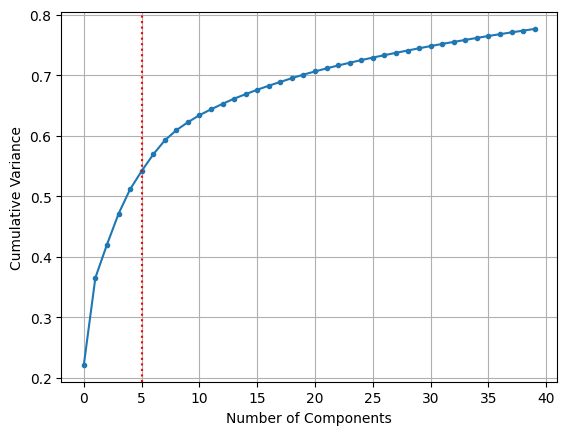

In [4]:
plt.plot(cum_var[:40], marker='.')
plt.grid(True)
plt.axvline(x=cum_count, color='r', linestyle='dotted')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()